# Testes da rotina da classe do Mapa Logístico

## 1. Importando as bibliotecas necessárias

### Bibliotecas obrigatórias

In [58]:
import numpy as np

#%matplotlib widget
import matplotlib.pyplot as plt

import seaborn as sns # a biblioteca 'seaborn' contém vários estilos para os gráficos do 'matpĺotlib'

# agora, melhoramos a qualidade de saida e de visualizacao da imagem 
# alem de mudar a fonte padrao para uma do latex
sns.set_style("ticks")
plt.rcParams['savefig.dpi'] = 200
plt.rcParams["figure.dpi"] = 100

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})

### Bibliotecas não-obrigatórias

In [2]:
import sys 
sys.path.insert(0, '../../scripts')
import logisticmap as lm

## 2. Definindo a função (debug)

Não é necessário executar essa linha se você estiver importando o arquivo com a classe.

In [61]:
class MapaLogistico:

    def __init__(self, r, x_inicial):
        """
        Descrição:
        ----------
        Construtor da classe 'MapaHenon'

        Parâmetros:
        -----------
        r: float
            Parâmetro do Mapa Logístico representando a taxa de crescimento populacional. Deve ser entre 0.0 e 4.0.
        x_inicial: float
            População inicial, deve variar entre 0 e 1.
        """

        if not ((type(r) is float) & ((r >= 0) & (r <= 4) )):
            raise TypeError("A taxa de crescimento populacional deve ser um float entre 0.0 e 4.0!")
            
        if not ((type(x_inicial) is float) & ((x_inicial >= 0) & (x_inicial <= 1))):
            raise TypeError("A população inicial deve ser um float!")

        self.__r = r
        self._x_atual = x_inicial
        
        pass

    def iterar(self):
        """
        Descrição:
        ----------
        Aplicar as equações de diferenças do Mapa Logístico para os pontos e parâmetrs atuais

        Parâmetros:
        -----------
        Nenhum
        """
        
        r = self.__r
        x = self._x_atual

        prox_x = r*x*(1 - x)
        self._x_atual = prox_x
        
        pass

    def posicao(self):
        """
        Descrição:
        ----------
        Retorna a posição x do mapa

        Parâmetros:
        -----------
        Nenhum
        """

        x = self._x_atual
        
        posicao = np.array([x])
        return posicao

## 3. Testando

In [62]:
r = 0.0
x_inicial = float(0.5)

mapa = MapaLogistico(r_inicial=r, x_inicial=x_inicial)

In [63]:
x = np.array([])
prox_x = np.array([])
n_iteracoes = 100000

for n in range(0, n_iteracoes):
    x = np.append(x, mapa.posicao())
    mapa.iterar()
    prox_x = np.append(prox_x, mapa.posicao())

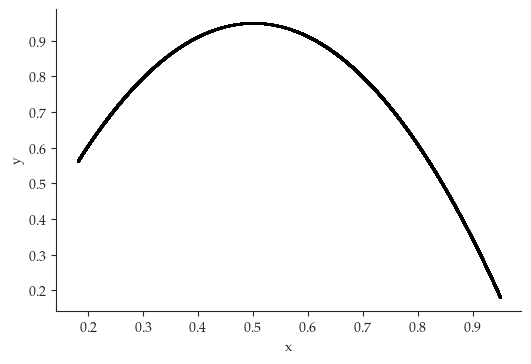

In [64]:
fig, ax = plt.subplots()
ax.scatter(x, prox_x, color='Black', s = 0.5, marker=".")

#ax.set_title(str(n_iteracoes) + " iterações do Mapa de Hénon para $a =$" + str(a) + " e $b =$ " + str(b) + "\n com $x_{0} =$ " + str(x[0]) + " e $y_{0} =$ " + str(y[0]))
ax.set_ylabel('y')
ax.set_xlabel('x')
    
ax.grid(False)
sns.despine()
plt.show()